### Networkx 사용방법

간단한 networkx 라이브러리 사용 방법입니다.<p>
    
[공식문서](https://networkx.org/documentation/latest/tutorial.html)를 참고했습니다. <p>
    
아래에서는 Core.today 데이터셋 카테고리의<br>
['2022년 1월 뉴스 NER'](https://core.today/dataset/j4U2b72w)을 사용해서 plotly로 시각화 해보겠습니다.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

- Nodes can be "anything" (e.g., text, images, XML records)<p>
- Edges can hold arbitrary data (e.g., weights, time-series)

In [2]:
# Create an empty graph structure (a "null graph") with no nodes and no edges.
G = nx.Graph()

## 노드 만들기

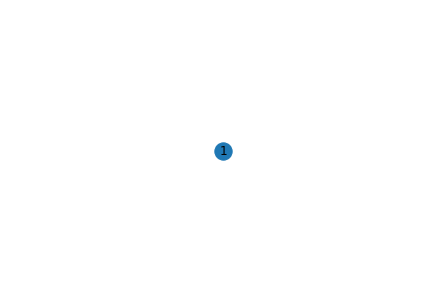

In [3]:
# 노드 하나 추가
G.add_node(1)

# 시각화
nx.draw(G, with_labels=True)
plt.show()

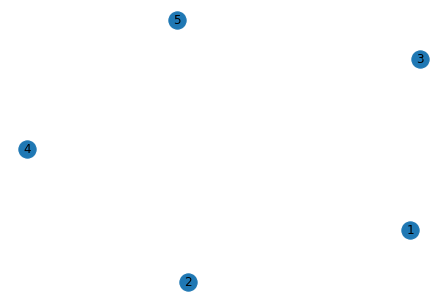

In [5]:
# 노드 여러개 추가 *any iterable container
G.add_nodes_from([2,3])

# 시각화
nx.draw(G, with_labels=True)
plt.show()

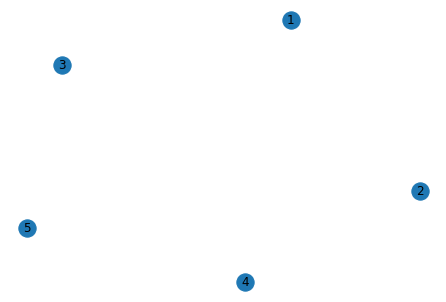

In [6]:
# node attribute와 함께 추가 (node, node_attribute_dict)
G.add_nodes_from([4,(5,{"color":"green"})])

# 시각화
nx.draw(G, with_labels=True)
plt.show()

In [6]:
# 노드 확인
G.nodes()

NodeView((1, 2, 3, 4, 5))

In [7]:
# 노드 확인
G.nodes.data()

NodeDataView({1: {}, 2: {}, 3: {}, 4: {}, 5: {'color': 'green'}})

## 엣지 만들기

노드를 미리 생성하지 않아도<p>
엣지를 생성할 때 자동으로 노드를 먼저 만들어 줍니다.

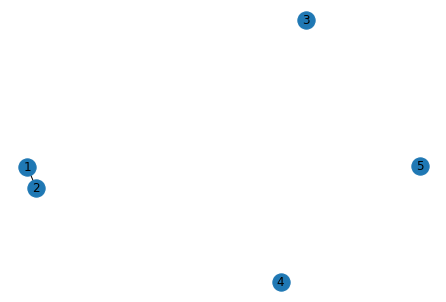

In [9]:
# 엣지 하나 추가
G.add_edge(1,2)

# 시각화
nx.draw(G, with_labels=True)
plt.show()

In [10]:
# 엣지 확인
G.edges()

EdgeView([(1, 2)])

In [11]:
# 엣지 확인
G.edges().data()

EdgeDataView([(1, 2, {})])

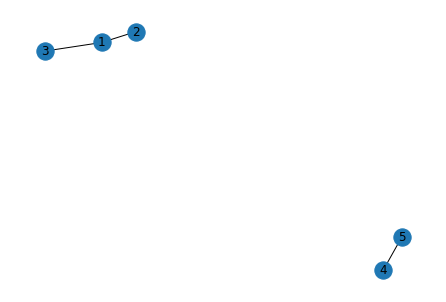

In [113]:
# 엣지 여러개 추가
G.add_edges_from([(1,3),(4,5)])
# 시각화
nx.draw(G, with_labels=True)
plt.show()

In [12]:
# 엣지 확인
G.edges().data()

EdgeDataView([(1, 2, {}), (1, 3, {}), (4, 5, {})])

In [13]:
# 노드에 연결된 엣지의 수
G.degree()

DegreeView({1: 2, 2: 1, 3: 1, 4: 1, 5: 1})

## 연결  바꾸기

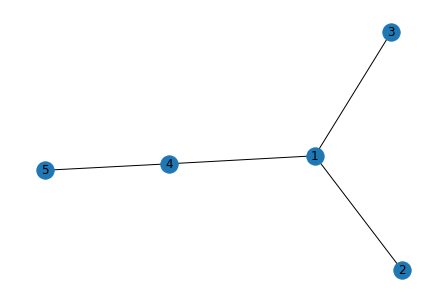

In [14]:
G.add_edges_from([(1,4)])
# 시각화
nx.draw(G, with_labels=True)
plt.show()

In [15]:
# edge 생성
G.add_edges_from([(1,4)])
# edge 삭제
G.remove_edge(1,4)
## G.remove_edges_from([(1,4),....])

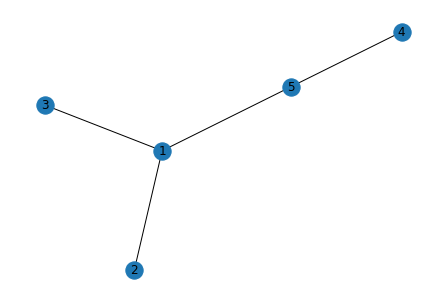

In [16]:
# edge 연결
G.add_edge(1,5)

# 시각화
nx.draw(G, with_labels=True)
plt.show()

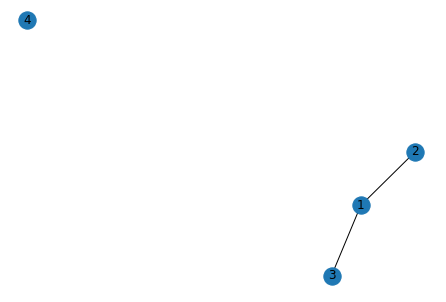

In [17]:
G.remove_node(5)

# 시각화
nx.draw(G, with_labels=True)
plt.show()

## 속성 부여하기

속성 값은 weight, color, time, position 등 자유롭게 부여할 수 있습니다.

### 그래프 속성

In [13]:
# 그래프 속성 부여
# 방법1
G = nx.Graph(color="green")

In [14]:
print(f" 그래프 속성 : {G.graph}")

 그래프 속성 : {'color': 'green'}


In [15]:
# 방법2
G.graph['color'] = "red"

In [16]:
print(f" 그래프  속성: {G.graph}")

 그래프  속성: {'color': 'red'}


### 노드 속성

In [17]:
# 노드 속성 부여
G.add_node(1, pos=(3,2))

In [18]:
G.nodes.data()

NodeDataView({1: {'pos': (3, 2)}})

In [19]:
G.nodes[1]['color']='white'

In [20]:
G.nodes[1]

{'pos': (3, 2), 'color': 'white'}

In [21]:
G.add_nodes_from([2], pos=(2,1))

In [22]:
G.nodes[2]

{'pos': (2, 1)}

In [23]:
print(f" 전체 노드 정보: {G.nodes.data()}")

 전체 노드 정보: [(1, {'pos': (3, 2), 'color': 'white'}), (2, {'pos': (2, 1)})]


### 엣지 속성

In [24]:
# 엣지 속성 부여
G.add_edge(1, 2, weight=3.3)

In [25]:
G.edges.data()

EdgeDataView([(1, 2, {'weight': 3.3})])

In [26]:
G[1][2]['weight'] = 3.2
G.edges.data()

EdgeDataView([(1, 2, {'weight': 3.2})])

-----

## 방향성 있는 그래프

In [27]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(f"out_degree : {DG.out_degree(1, weight='weight')}")
print(f"in_degree : {DG.in_degree(1, weight='weight')}")

out_degree : 0.5
in_degree : 0.75


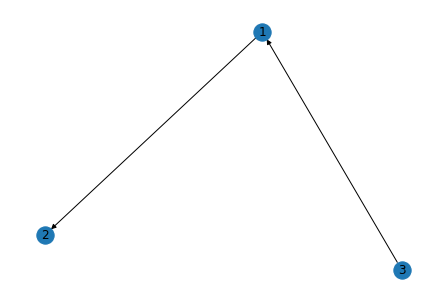

In [28]:
nx.draw(DG, with_labels=True)
plt.show()

## 뉴스 데이터로 그래프 그리기

'2022년 1월 뉴스 NER' 데이터와 plotly 라이브러리로 네트워크를 시각화 하겠습니다.

In [33]:
# # 파일 다운로드

import coredotdata as cdd
cdd.download_dataset("Hak403n4")

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [05:07<00:00, 10.26s/it]


In [31]:
pip install coredotdata

Note: you may need to restart the kernel to use updated packages.


In [34]:
from itertools import combinations # 조합만들기
import pandas as pd
import ast # 데이터 변환

### 데이터 전처리

In [35]:
# 데이터 로드 및 확인
df = pd.read_csv('./dataset/20220601.csv')
df.head(3)

,n,title,press,date,ner
0,0,"""아련함에 가려졌다""..빅톤, 이제 섹시할 시간(종합)",더팩트,2022-06-01 00:00:00,"[[('31일', 'DATE'), ('7집', 'QUANTITY'), ('Chaos..."
1,1,"국민의힘, '경기'에 화력 집중..계양·제주에선 '이재명' 직격",데일리안,2022-06-01 00:00:00,"[[('안철수', 'PERSON'), ('국민의힘', 'ORGANIZATION'),..."
2,2,'세월호 분향소서 성관계' 주장 60대 유튜버 1심 유죄,더팩트,2022-06-01 00:00:00,"[[('벌금', 'CIVILIZATION'), ('150만원', 'QUANTITY'..."


현재 ner값은 텍스트로 저장이 되어있어서,<br>
ast 라이브러리로 변환하겠습니다.<p>

ast.literal_eval() 함수는 문자열의 표현식을 인식해서 evaluate 해줍니다.

In [36]:
# 데이터 전처리
df['ner_processed'] = df.ner.apply(lambda x : ast.literal_eval(x))
df.head(3)

,n,title,press,date,ner,ner_processed
0,0,"""아련함에 가려졌다""..빅톤, 이제 섹시할 시간(종합)",더팩트,2022-06-01 00:00:00,"[[('31일', 'DATE'), ('7집', 'QUANTITY'), ('Chaos...","[[(31일, DATE), (7집, QUANTITY), (Chaos, ARTIFAC..."
1,1,"국민의힘, '경기'에 화력 집중..계양·제주에선 '이재명' 직격",데일리안,2022-06-01 00:00:00,"[[('안철수', 'PERSON'), ('국민의힘', 'ORGANIZATION'),...","[[(안철수, PERSON), (국민의힘, ORGANIZATION), (성남, LO..."
2,2,'세월호 분향소서 성관계' 주장 60대 유튜버 1심 유죄,더팩트,2022-06-01 00:00:00,"[[('벌금', 'CIVILIZATION'), ('150만원', 'QUANTITY'...","[[(벌금, CIVILIZATION), (150만원, QUANTITY), (세월호,..."


### ner 구조를 확인

In [37]:
df.ner_processed[0][:2] # 리스트 안에 텍스트 한 줄에 대한 ner 값이 리스트로 들어가 있다.

[[('31일', 'DATE'),
  ('7집', 'QUANTITY'),
  ('Chaos', 'ARTIFACT'),
  ('빅톤', 'PERSON'),
  ('왼쪽', 'TERM'),
  ('병찬', 'PERSON'),
  ('찬', 'PERSON'),
  ('세준', 'PERSON'),
  ('수빈', 'PERSON'),
  ('한세', 'PERSON'),
  ('승식', 'PERSON'),
  ('31일', 'DATE'),
  ('오후', 'TIME'),
  ('서울', 'LOCATION'),
  ('광진구', 'LOCATION'),
  ('예스24 라이브', 'ARTIFACT'),
  ('7집', 'QUANTITY'),
  ('Chaos', 'ARTIFACT')],
 [('윤웅', 'PERSON'),
  ('더팩트', 'ORGANIZATION'),
  ('정병근', 'PERSON'),
  ('빅톤', 'PERSON')]]

In [39]:
for i in df.ner_processed:
    for j in i:
        print(j)
        break
    break

[('31일', 'DATE'), ('7집', 'QUANTITY'), ('Chaos', 'ARTIFACT'), ('빅톤', 'PERSON'), ('왼쪽', 'TERM'), ('병찬', 'PERSON'), ('찬', 'PERSON'), ('세준', 'PERSON'), ('수빈', 'PERSON'), ('한세', 'PERSON'), ('승식', 'PERSON'), ('31일', 'DATE'), ('오후', 'TIME'), ('서울', 'LOCATION'), ('광진구', 'LOCATION'), ('예스24 라이브', 'ARTIFACT'), ('7집', 'QUANTITY'), ('Chaos', 'ARTIFACT')]


## 그래프 생성

In [89]:
import plotly.graph_objects as go

In [90]:
# 그래프 객체 생성
g = nx.Graph()

하루의 모든 기사를 네트워크로 생성하면 많은 수의 노드와 엣지로 오래 걸리기 때문에<p>
3개의 뉴스기사만으로 네트워크로 그려보겠습니다.

In [91]:
df_topgun = df[df['title'].str.contains("탑건")].reset_index(drop=True)

In [92]:
df_topgun.head(3)

,n,title,press,date,ner,ner_processed
0,2632,"할리우드, 中 눈치보기 탈피?..""'탑건'에 대만 국기 등장""",연합뉴스,2022-06-01 07:18:00,"[[('대만', 'LOCATION'), ('탑건', 'ARTIFACT'), ('주인...","[[(대만, LOCATION), (탑건, ARTIFACT), (주인공, CIVILI..."
1,2827,"[문화연예 플러스] 36년 만에 비상한 '탑건', 북미서 흥행 신기록",MBC,2022-06-01 07:42:00,"[[('뉴스투데이', 'ORGANIZATION'), ('36년 만', 'DATE')...","[[(뉴스투데이, ORGANIZATION), (36년 만, DATE), (탑건:매버..."
2,2973,"'탑건' 톰 크루즈 재킷에 환호..""할리우드 새 페이지"" 왜?",SBS,2022-06-01 07:57:00,"[[('탑건', 'ARTIFACT'), ('타이완', 'LOCATION'), ('할...","[[(탑건, ARTIFACT), (타이완, LOCATION), (할리우드, LOCA..."


In [93]:
for total_text in df_topgun.ner_processed[:3]:
    for phrase in total_text:
        combo_list = [] # 리스트 초기화

        for word in phrase:
            combo_list.append(word[0]) # 텍스트만 따로 리스트에 저장
            
        edges_list = list(combinations(combo_list, 2)) # 리스트의 요소를 2개씩 묶음
        g.add_edges_from(edges_list) # 엣지 추가로 자동 노드 생성
        
        # 노드에 weight 추가
        for word in combo_list:
            try:
                g.nodes[word]['weight'] += 1
            except:
                g.nodes[word]['weight'] = 1

한 문장의 안의 단어 리스트의 요소 2개를 뽑아서 한 쌍으로 만들고,<br>
한 쌍안의 요소 두 개를 노드로 만들어 서로 연결하기 위해서 combinations 함수를 사용했습니다.

In [94]:
# 네트워크 확인
nx.info(g)

C:\Users\kgt08\AppData\Local\Temp\ipykernel_26616\27541684.py:2: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




'Graph with 71 nodes and 349 edges'

In [95]:
# gexf 만들기
nx.write_gexf(g,'gephi_topgun.gexf')

### 노드 위치 설정

In [96]:
# networkx의 spring layout 사용
spring2d = nx.spring_layout(g) #모든 엣지의 길이를 거의 같게 만들어줌

In [97]:
# 네트워크 객체에 pos 속성으로 [x, y] 좌표 추가
for _key in spring2d:
    g.nodes[_key]['pos'] = [spring2d[_key][0],spring2d[_key][1]]

### plotly 사용해서 그래프 그리기

In [98]:
list(g.edges())[:5]

[('대만', '탑건'), ('대만', '주인공'), ('대만', '점퍼'), ('대만', '파라마운트'), ('대만', '로스앤젤레스')]

In [99]:
# edge 좌표 [시작, 끝, None] 2차원이기 때문에 None값
edge_x = []
edge_y = []

for edge in g.edges():
    x0, y0 = g.nodes[edge[0]]['pos']
    x1, y1 = g.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# edge 그래프 선으로 그리기
edge_trace = go.Scatter(
    x=edge_x, 
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

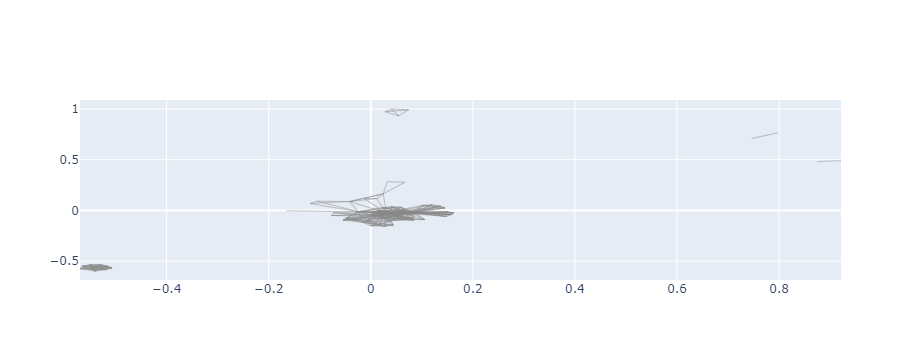

In [100]:
fig = go.Figure(edge_trace)
fig.show()

In [101]:
# node 좌표
node_x = []
node_y = []
for node in g.nodes():
    x, y = g.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

In [102]:
# 가중치 리스트 생성
weight_list = []

for i in g.nodes():
    weight_list.append(g.nodes[i]['weight'])

In [103]:
# plotly document에 따라 설정
# node 그래프 마커, 동그라미로 그리기
node_trace = go.Scatter(
    x=node_x, 
    y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu', # plotly에 검색해서 colorscale변경 가능
        reversescale=True,
        color=weight_list, # 노드가 가진 weight에 따라서 color 지정
        size=weight_list, # 노드가 가진 weight에 따라서 size 지정
        sizemin=3,
        colorbar=dict(
            thickness=15,
            title='Node Weight',
            xanchor='left',
            titleside='right'
        ),
        line_width=1)) # 마커 겉 테두리

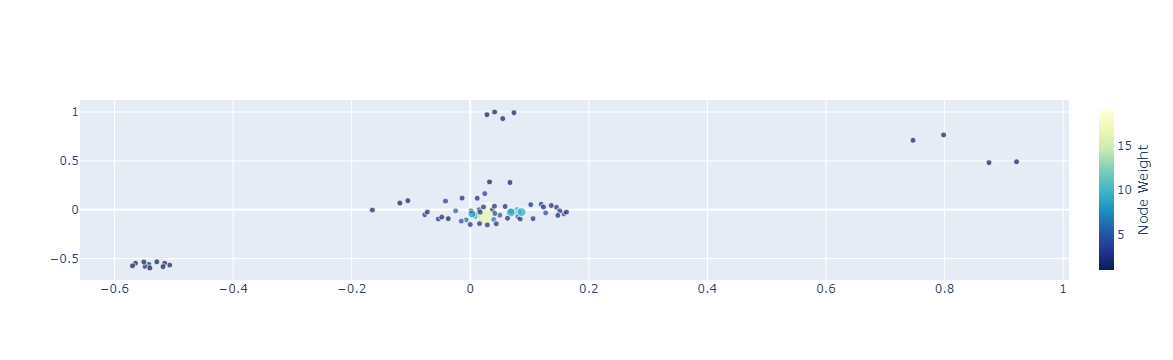

In [104]:
fig = go.Figure(node_trace)
fig.show()

In [105]:
# 노드 text 지정
node_text = []

for node in g.nodes():
    node_text.append('# name : '+ str(node))

node_trace.text = node_text

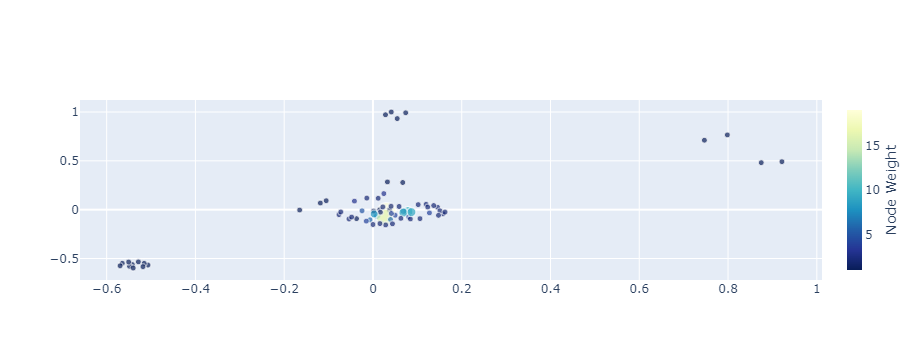

In [106]:
fig = go.Figure(node_trace)
fig.show()

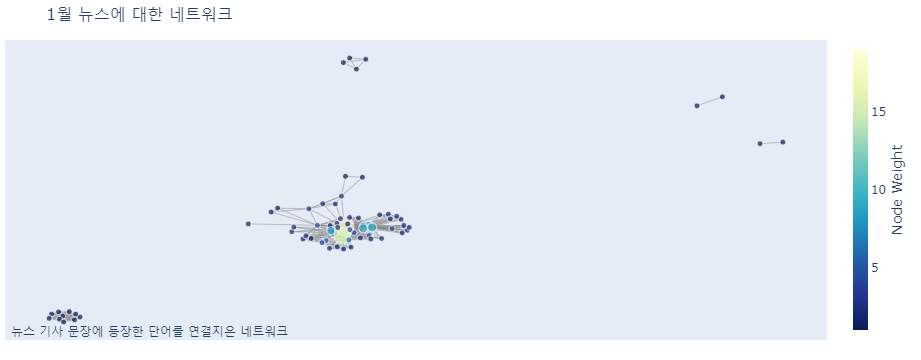

In [107]:
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
                title=f'1월 뉴스에 대한 네트워크<br>',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="뉴스 기사 문장에 등장한 단어를 연결지은 네트워크",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

# 연결 재구조화

In [108]:
recon_list = []

for i in g.edges():
    if i[0]=="탑건:매버릭":
        recon_list.append(i[1])
        
    elif i[1]=="탑건:매버릭":
        recon_list.append(i[0])
        
g.remove_node("탑건:매버릭")

for i in recon_list:
    g.add_edge("탑건",i)

In [109]:
# 네트워크 확인
nx.info(g)

C:\Users\kgt08\AppData\Local\Temp\ipykernel_26616\27541684.py:2: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




'Graph with 70 nodes and 335 edges'

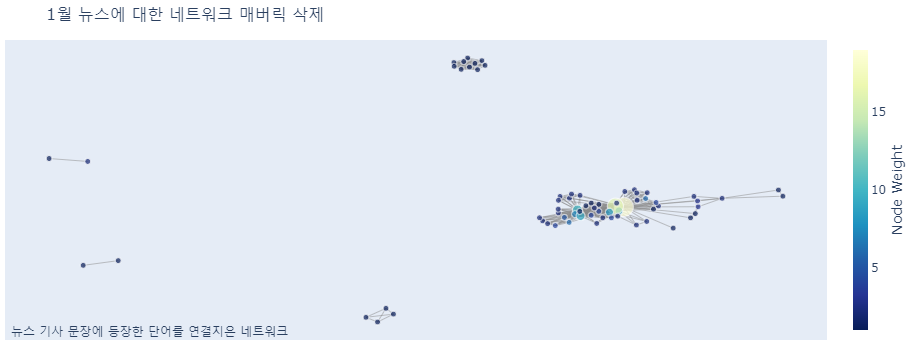

In [110]:
# networkx의 spring layout 사용
spring2d = nx.spring_layout(g)

# 네트워크 객체에 pos 속성으로 [x, y] 좌표 변경
for _key in spring2d:
    g.nodes[_key]['pos'] = [spring2d[_key][0],spring2d[_key][1]]
    
# edge 좌표 [시작, 끝, None] 2차원이기 때문에 None값
edge_x = []
edge_y = []

for edge in g.edges():
    x0, y0 = g.nodes[edge[0]]['pos']
    x1, y1 = g.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# edge 그래프 선으로 그리기
edge_trace = go.Scatter(
    x=edge_x, 
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# node 좌표
node_x = []
node_y = []
for node in g.nodes():
    x, y = g.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

# plotly document에 따라 설정
# node 그래프 마커, 동그라미로 그리기
node_trace = go.Scatter(
    x=node_x, 
    y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu', # plotly에 검색해서 colorscale변경 가능
        reversescale=True,
        color=weight_list, # 노드가 가진 weight에 따라서 color 지정
        size=weight_list, # 노드가 가진 weight에 따라서 size 지정
        sizemin=3,
        colorbar=dict(
            thickness=15,
            title='Node Weight',
            xanchor='left',
            titleside='right'
        ),
        line_width=1)) # 마커 겉 테두리

# 노드 text 지정
node_text = []

for node in g.nodes():
    node_text.append('# name : '+ str(node))

node_trace.text = node_text

# 가중치 리스트 생성
weight_list = []

for i in g.nodes():
    weight_list.append(g.nodes[i]['weight'])
    
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
                title=f'1월 뉴스에 대한 네트워크 매버릭 삭제<br>',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="뉴스 기사 문장에 등장한 단어를 연결지은 네트워크",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

# gexf 파일 읽기

In [111]:
topgun_g = nx.read_gexf('G:/다른 컴퓨터/내 컴퓨터/구글 드라이브 백업/UNIST 딥러닝/gephi_topgun.gexf')

In [112]:
nx.info(topgun_g)

C:\Users\kgt08\AppData\Local\Temp\ipykernel_26616\2510658890.py:1: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




'Graph with 71 nodes and 349 edges'